In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/Users/daniel_vander-hyde/Documents/git/my_python/matplotlib/stylelib/pptsize')
meas_dir = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements'

In [3]:
#Data import
#HVA
dbHVA = np.loadtxt(meas_dir + "/HVASVR_tf/HVACH3_plus_pomona/02_19_2020/dB.txt")
degHVA = np.loadtxt(meas_dir + "/HVASVR_tf/HVACH3_plus_pomona/02_19_2020/DEG.TXT")
#OLG (08-21-2020)
olgdb = np.loadtxt(meas_dir + '/OLG/algaas/08_21_2020/dB.TXT')
olgdeg = np.loadtxt(meas_dir + '/OLG/algaas/08_21_2020/deg.TXT')
#noise
floor = np.loadtxt(meas_dir + '/free_running_spectra/08_21_2020/noise_floor.TXT')
vpk300connected = np.loadtxt(meas_dir + '/free_running_spectra/08_21_2020/300vpk_connected.TXT')
vpk300disconnected = np.loadtxt(meas_dir + '/free_running_spectra/08_21_2020/300vpk_notconnected.TXT')
#swept_freq
sfdb = np.loadtxt(meas_dir + '/electrode_swept_frequency/08_21_2020/dB.TXT')
sfdeg = np.loadtxt(meas_dir + '/electrode_swept_frequency/08_21_2020/deg.TXT')

In [4]:
#OLG (01-16-2020)
olgdb2 = np.loadtxt(meas_dir + '/OLG/1_16_2020/db.TXT')
olgdeg2 = np.loadtxt(meas_dir + '/OLG/1_16_2020/deg.TXT')

In [5]:
ffff = olgdb2[:,0]

In [6]:
#HVA measurements
ff = dbHVA[:,0]
aa = 10**(dbHVA[:,1]/20)* np.exp(1j*(degHVA[:,1]/180)*np.pi)

Text(0, 0.5, 'dB')

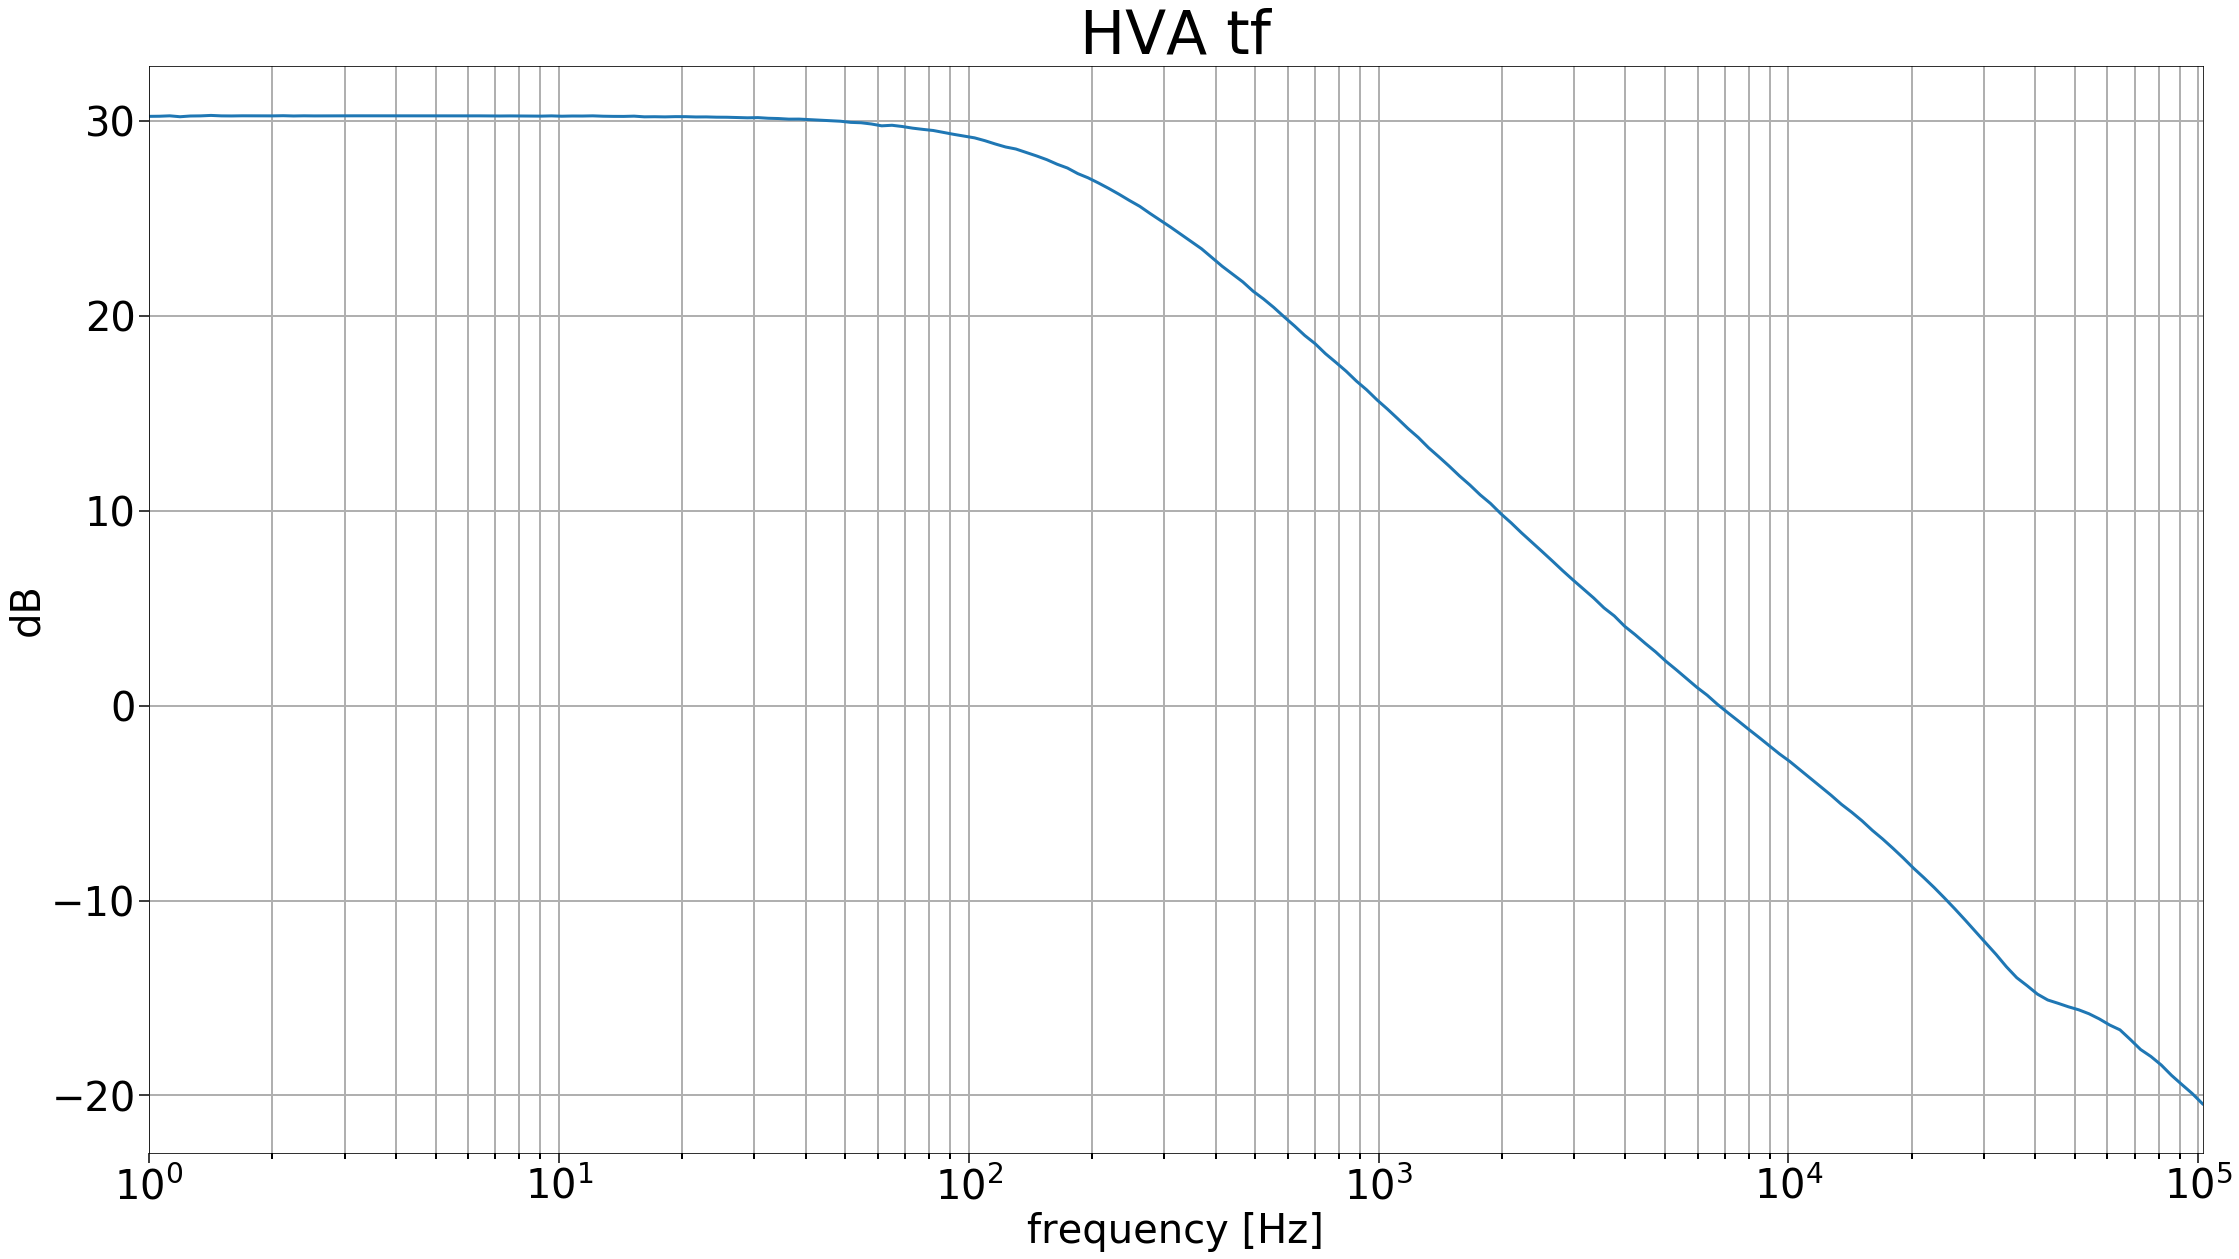

In [27]:
plt.semilogx(ff,dbHVA[:,1],linewidth=3)
#plt.semilogx(ff,abs(aa),linewidth=3)
plt.xlim(ff[0], ff[-1])
plt.title('HVA tf')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')

In [8]:
#OLG measurements
f = olgdb[:,0]
bb = 10**(olgdb[:,1]/20)*np.exp(1j*(olgdeg[:,1]/180)*np.pi)

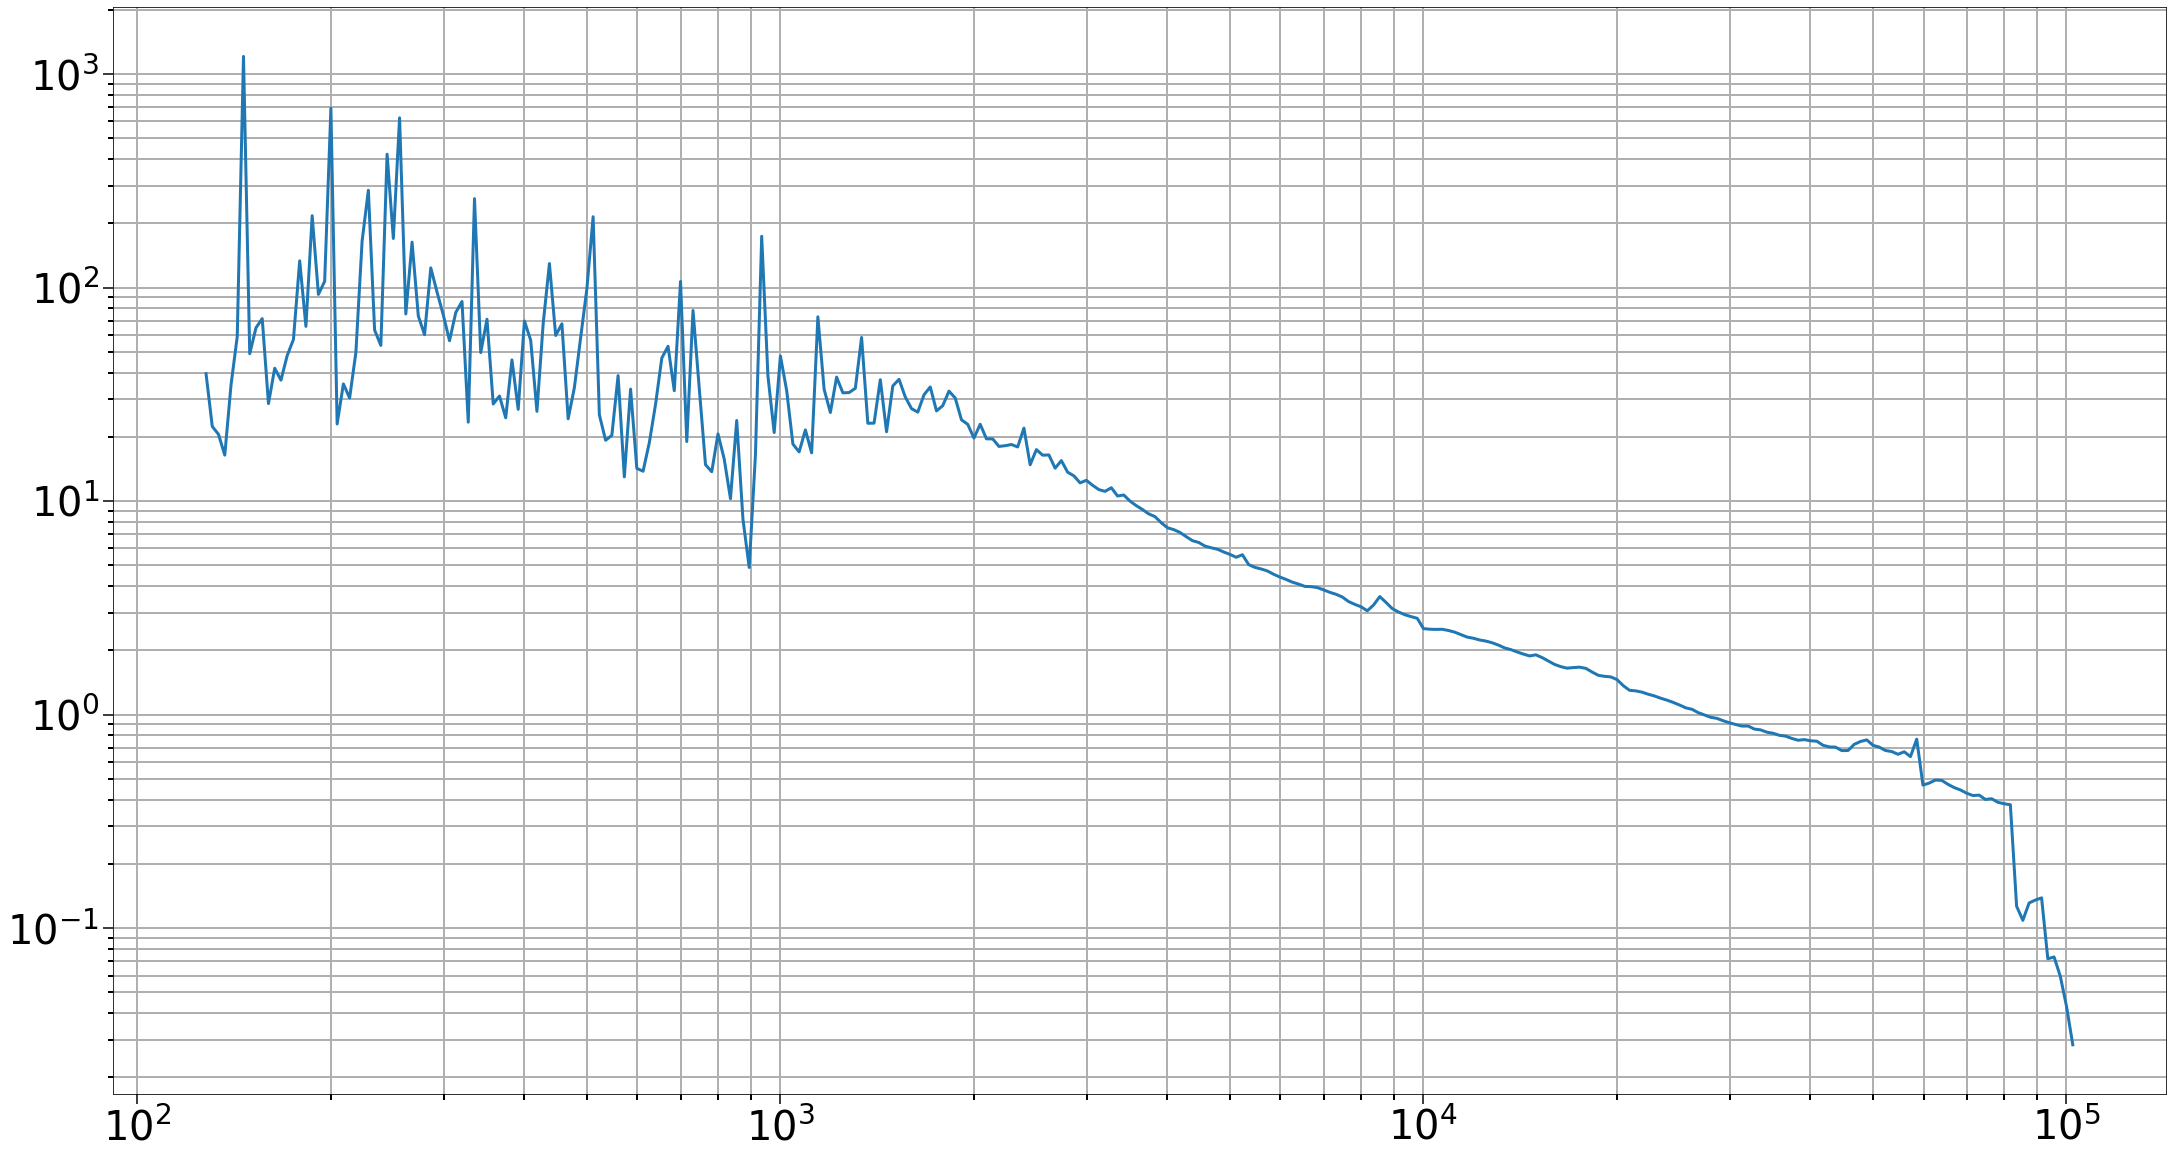

In [25]:
plt.loglog(f, abs(bb))

Text(0, 0.5, 'phase [deg]')

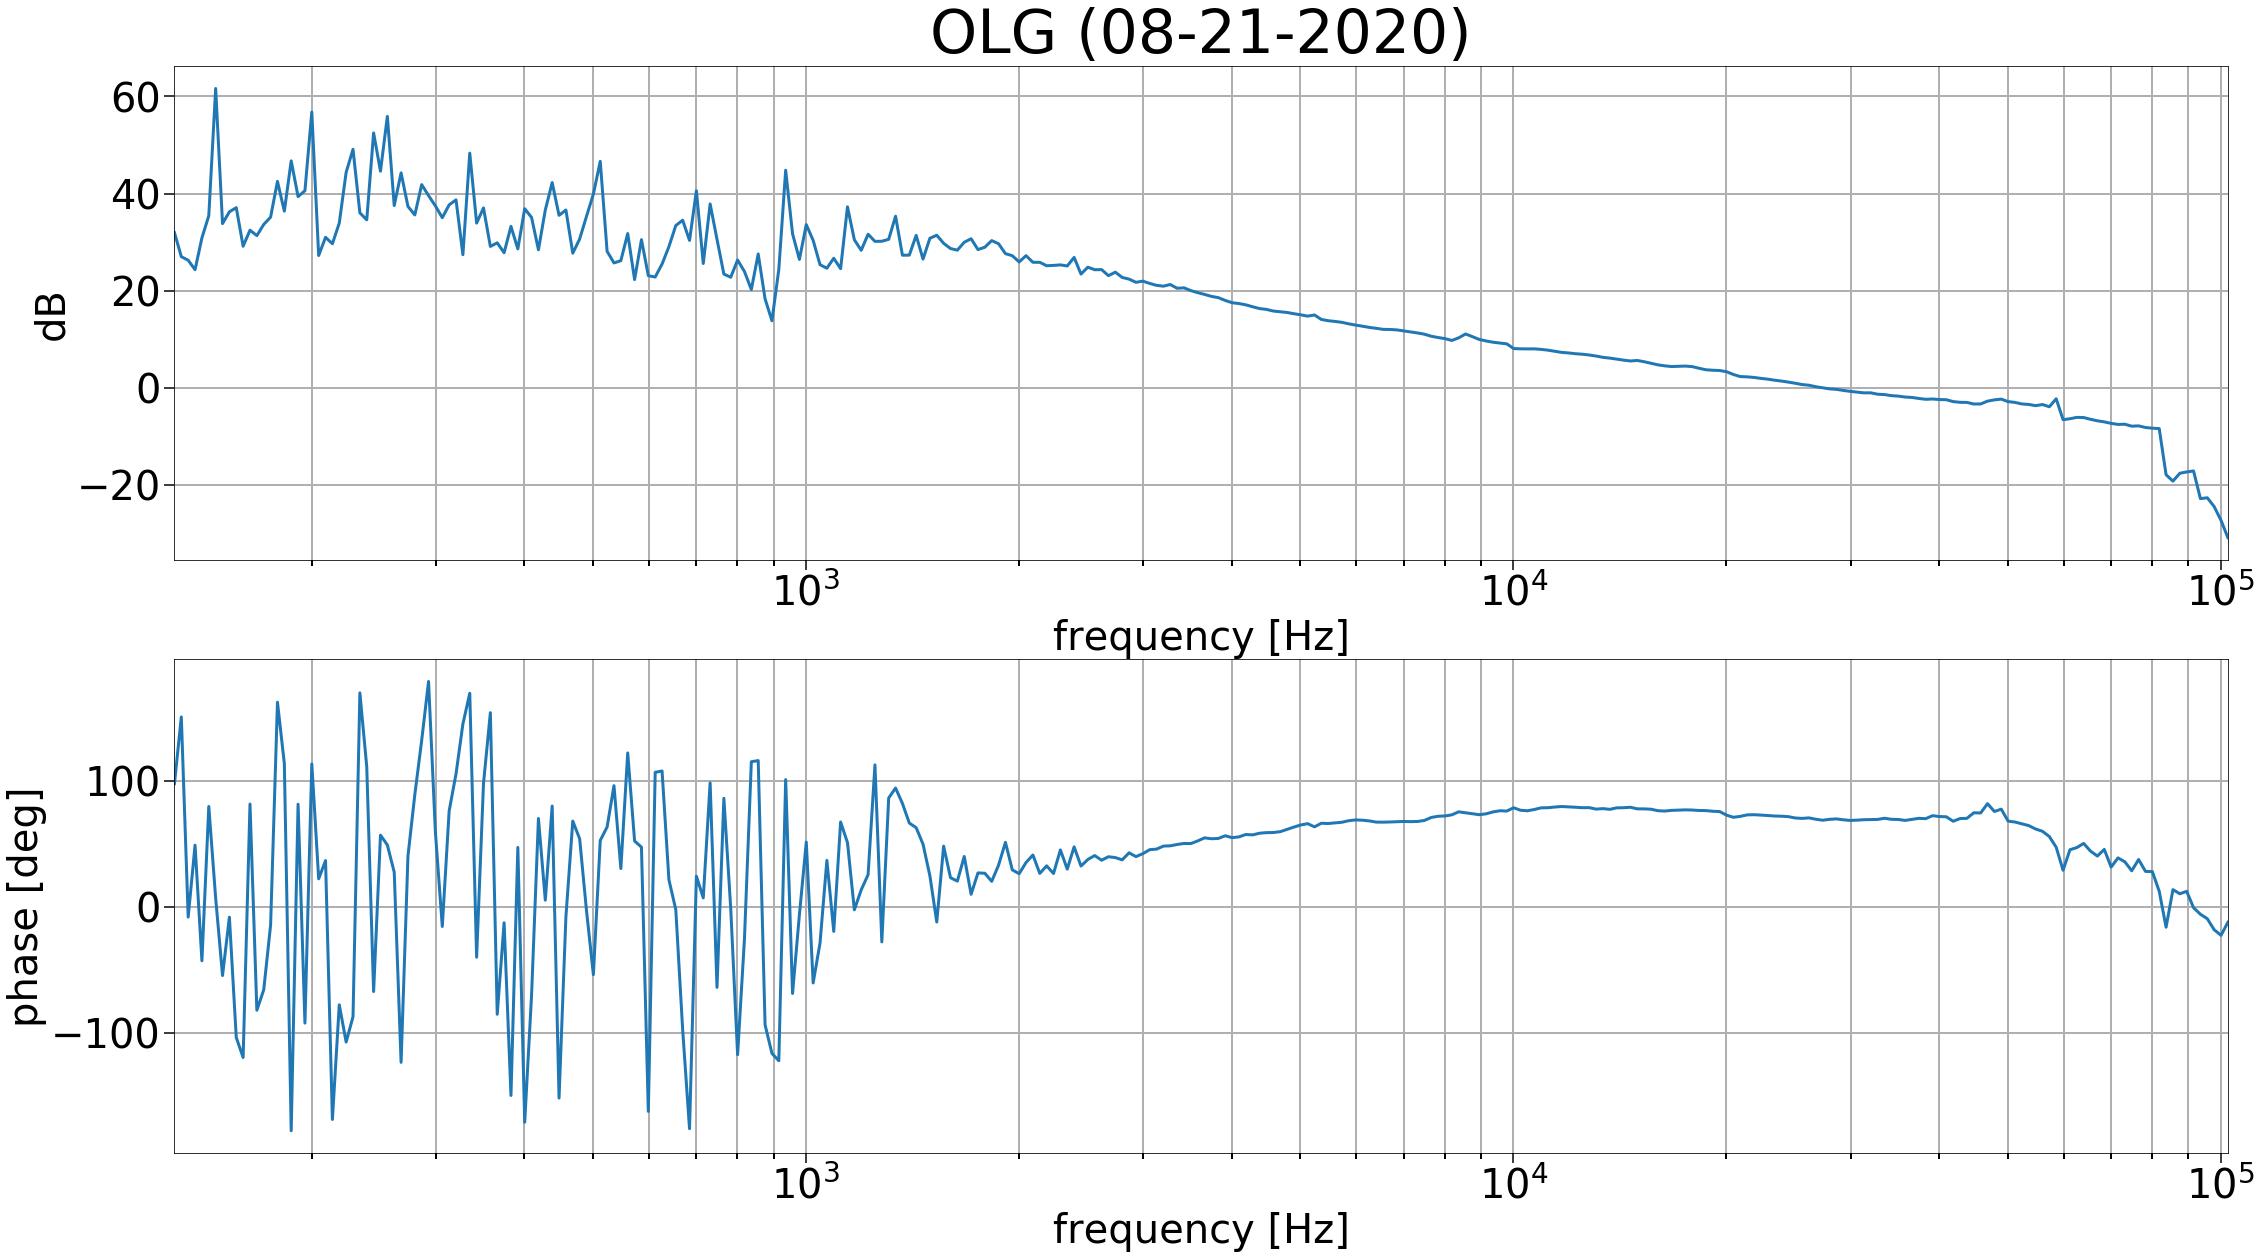

In [9]:
plt.subplot(211)
plt.semilogx(f,olgdb[:,1],linewidth=3)
plt.xlim(f[0], f[-1])
plt.title('OLG (08-21-2020)')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
plt.subplot(212)
plt.semilogx(f,olgdeg[:,1],linewidth=3)
plt.xlim(f[0], f[-1])
plt.xlabel('frequency [Hz]')
plt.ylabel('phase [deg]')

Text(0, 0.5, 'phase [deg]')

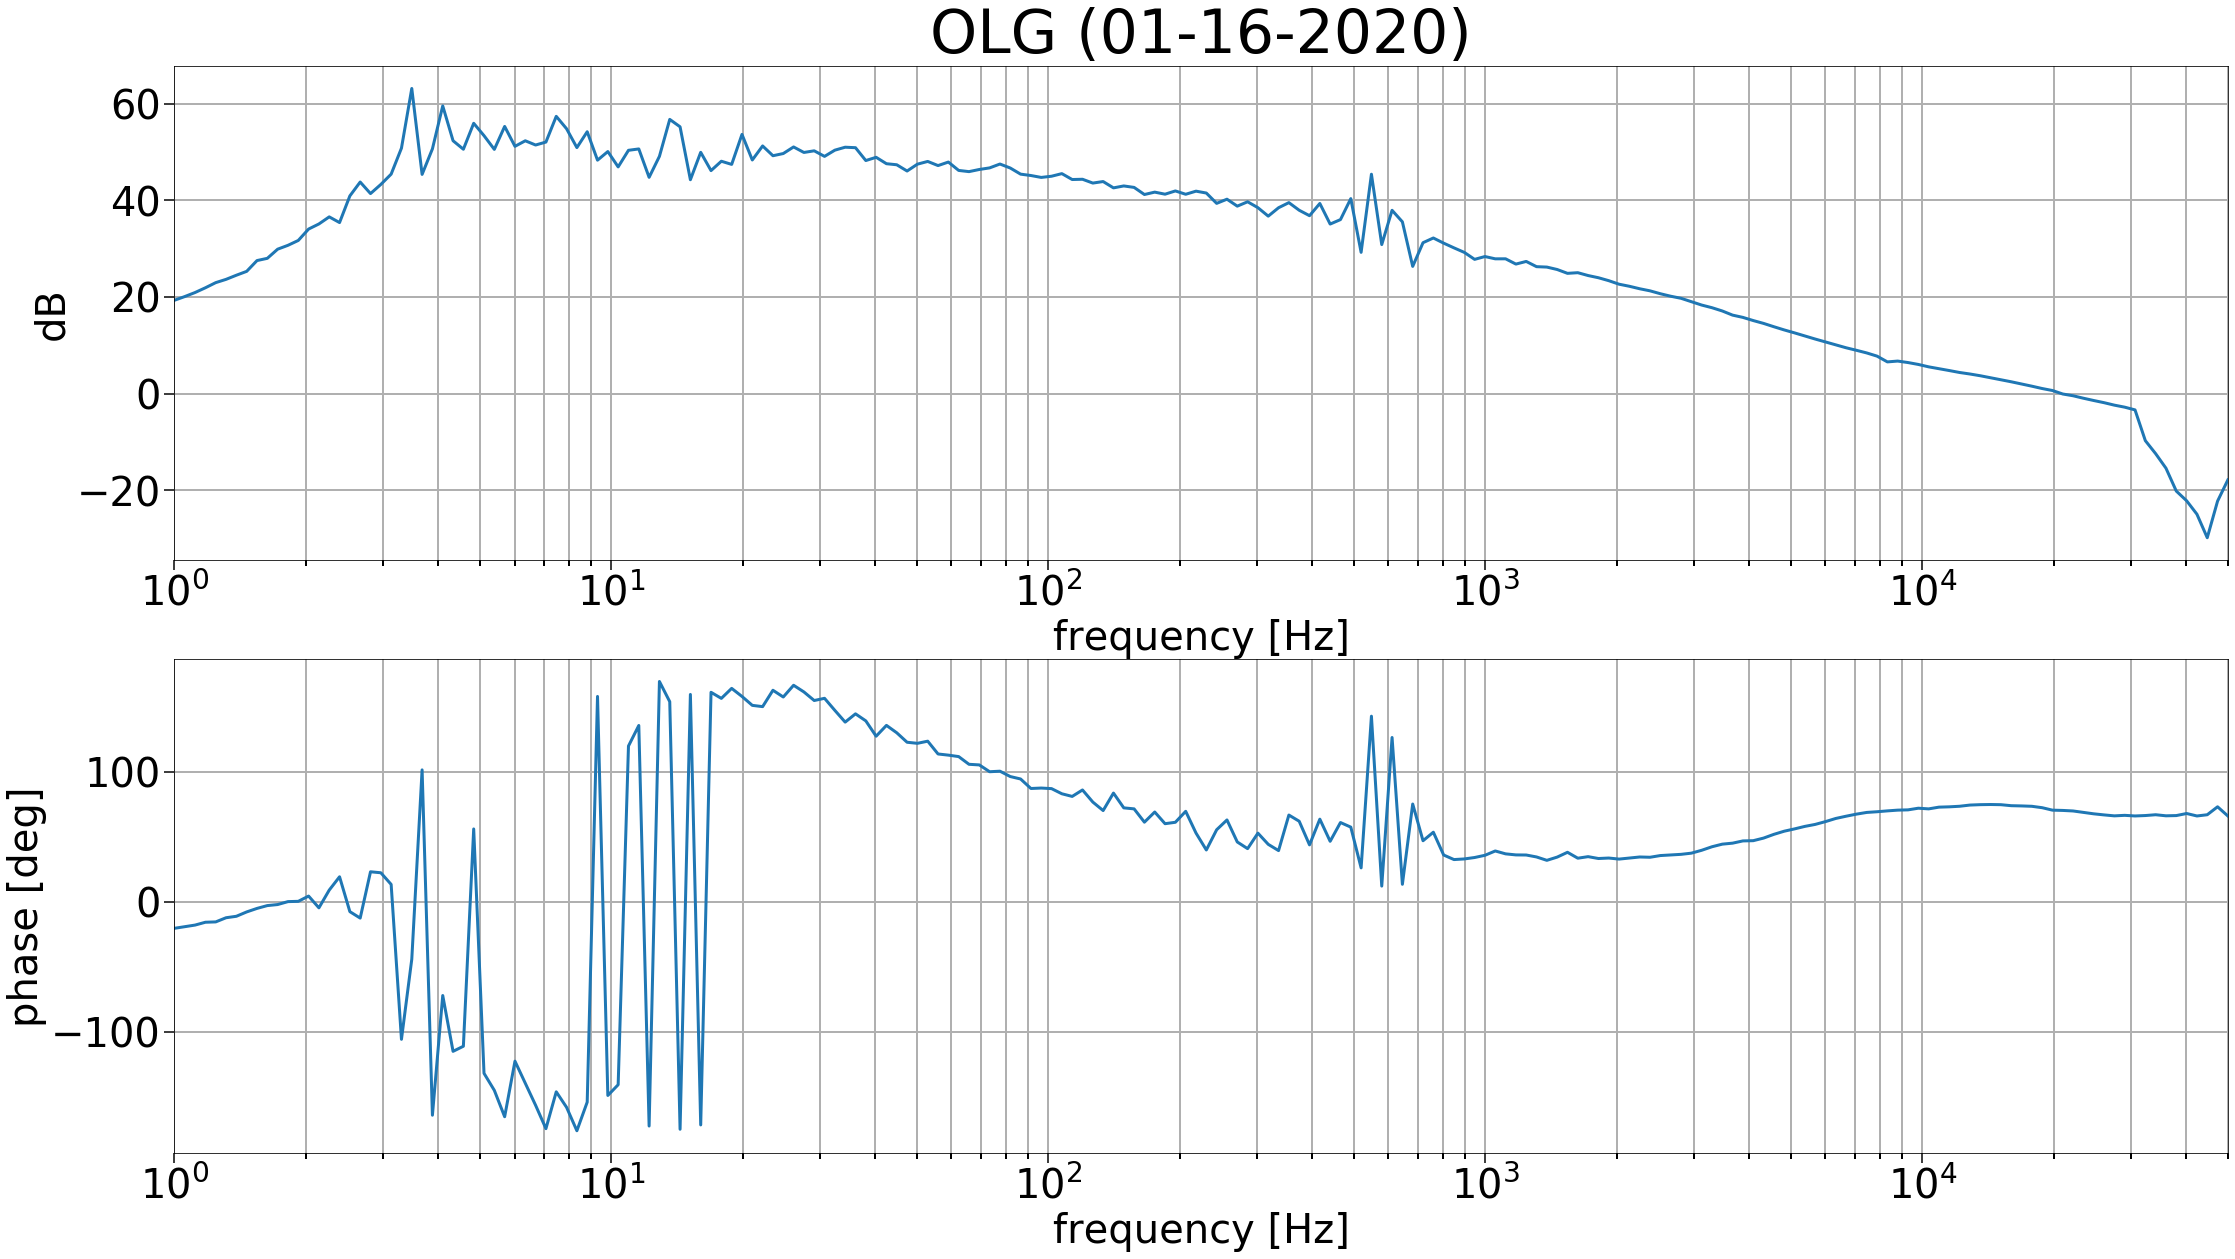

In [10]:
plt.subplot(211)
plt.semilogx(ffff,olgdb2[:,1],linewidth=3)
plt.xlim(ffff[0], ffff[-1])
plt.title('OLG (01-16-2020)')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
plt.subplot(212)
plt.semilogx(ffff,olgdeg2[:,1],linewidth=3)
plt.xlim(ffff[0], ffff[-1])
plt.xlabel('frequency [Hz]')
plt.ylabel('phase [deg]')

In [11]:
#Cav info 
c = 299792458
lamb =1.064e-6
nu = c/lamb
Lcav = 0.165
cav_fac = Lcav/nu

In [20]:
#Laser actuation freq response
laserV2Hz = 1e6
a = np.interp(f, ff,aa)
aHzpV = laserV2Hz*a

In [21]:
#Calibration function
OLG = bb
CLG = 1/(1-OLG)
CAL_=OLG*CLG
CALVpHz=CAL_/aHzpV
CALHzpV = aHzpV/CAL_

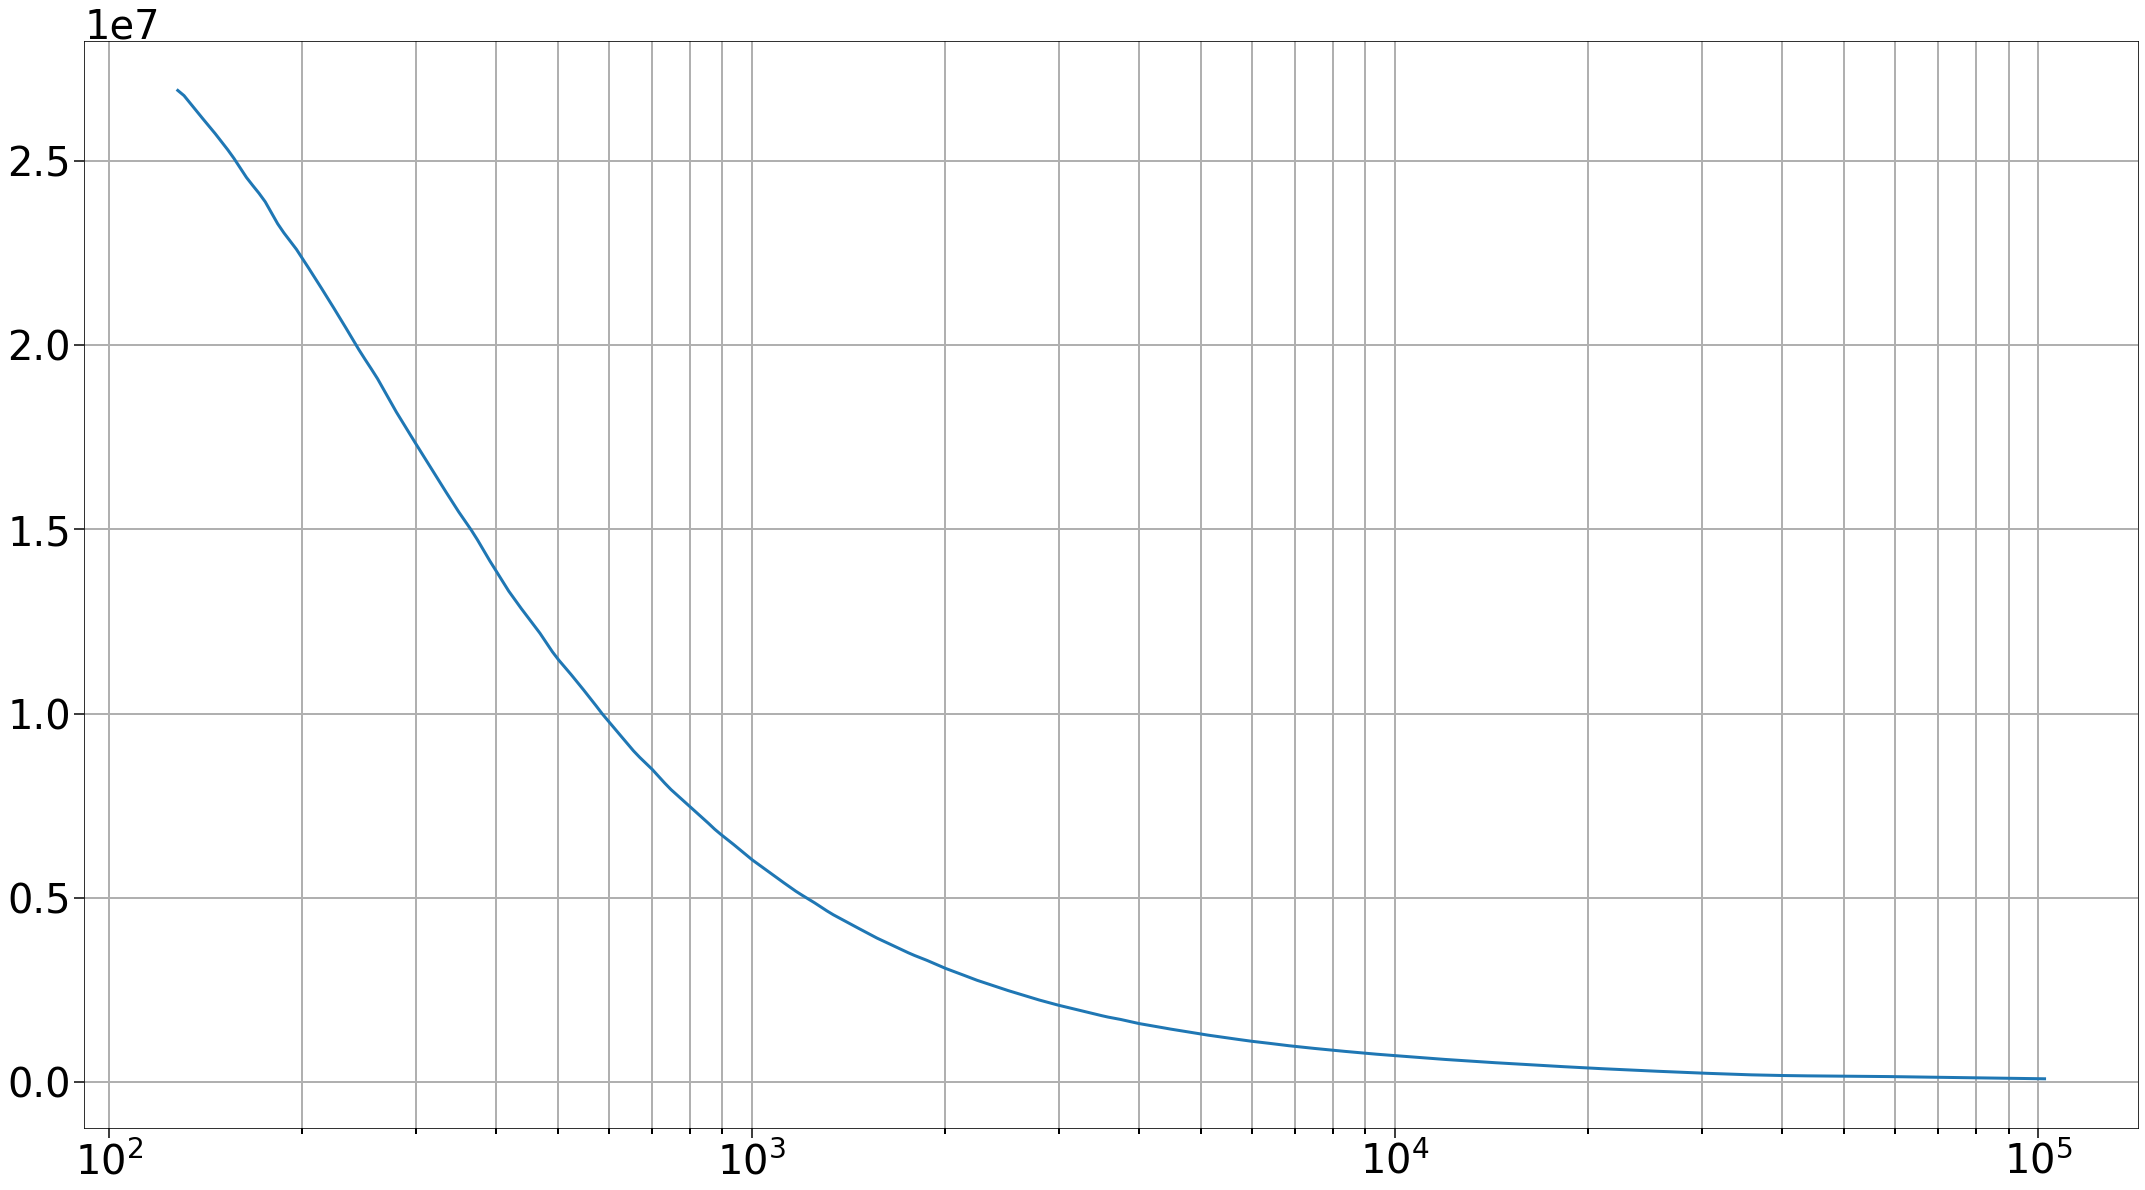

In [18]:
plt.semilogx(f,abs(aHzpV),linewidth=3)

In [39]:
fff = floor[:,0]
cal = np.interp(fff,f, CALHzpV)

/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


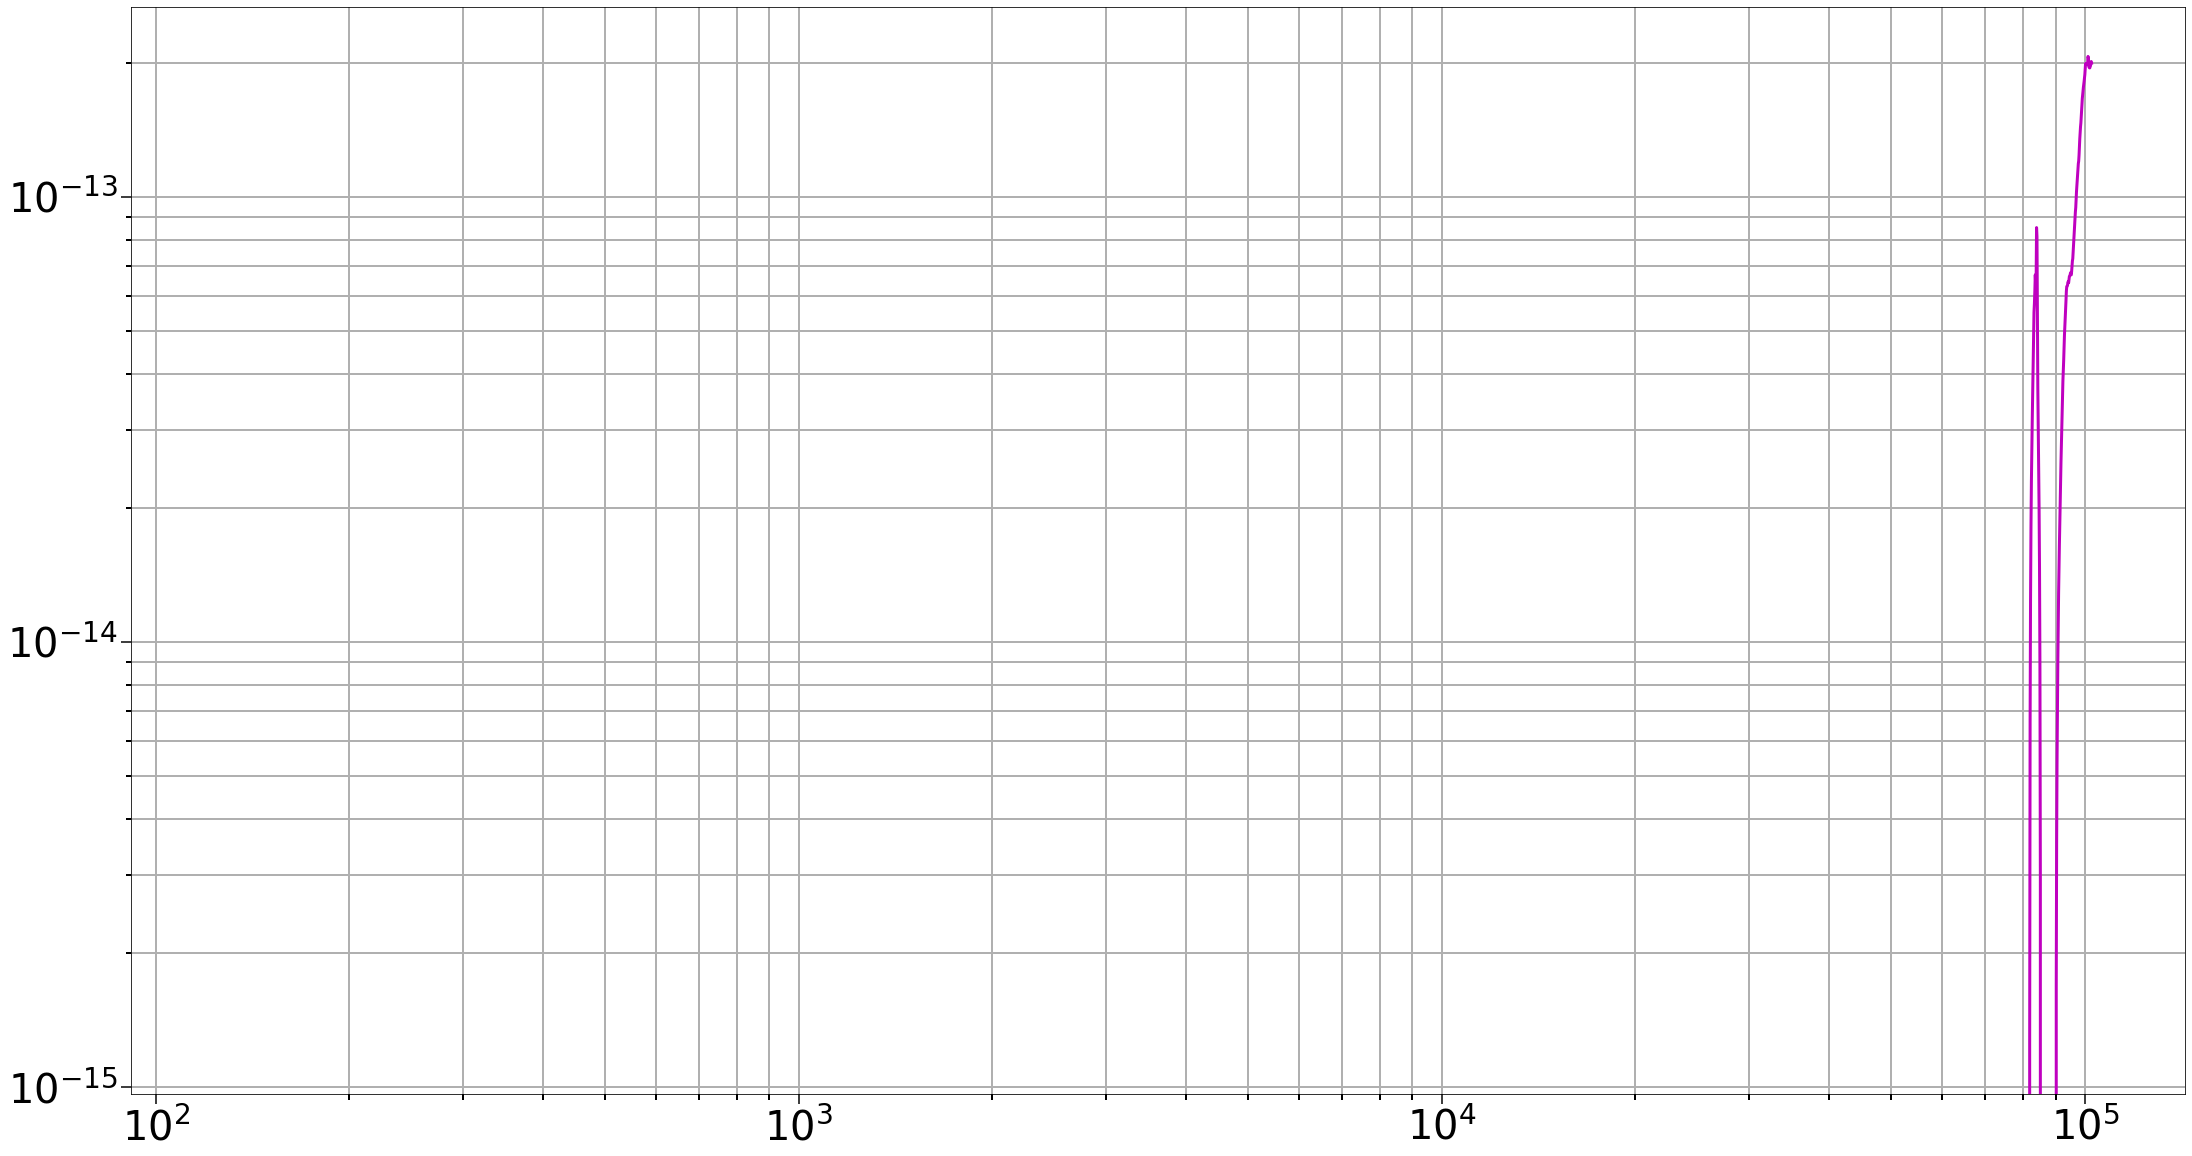

In [44]:
#noise measurements
plt.loglog(fff,floor[:,1]*cal*cav_fac,color = 'm', label='Electrodes not driven',linewidth=3)

In [43]:
len(floor

800

In [5]:
#Swept frequency measurements

In [26]:
len(ff)

200

In [27]:
len(f)

300

Text(0, 0.5, 'phase [deg]')

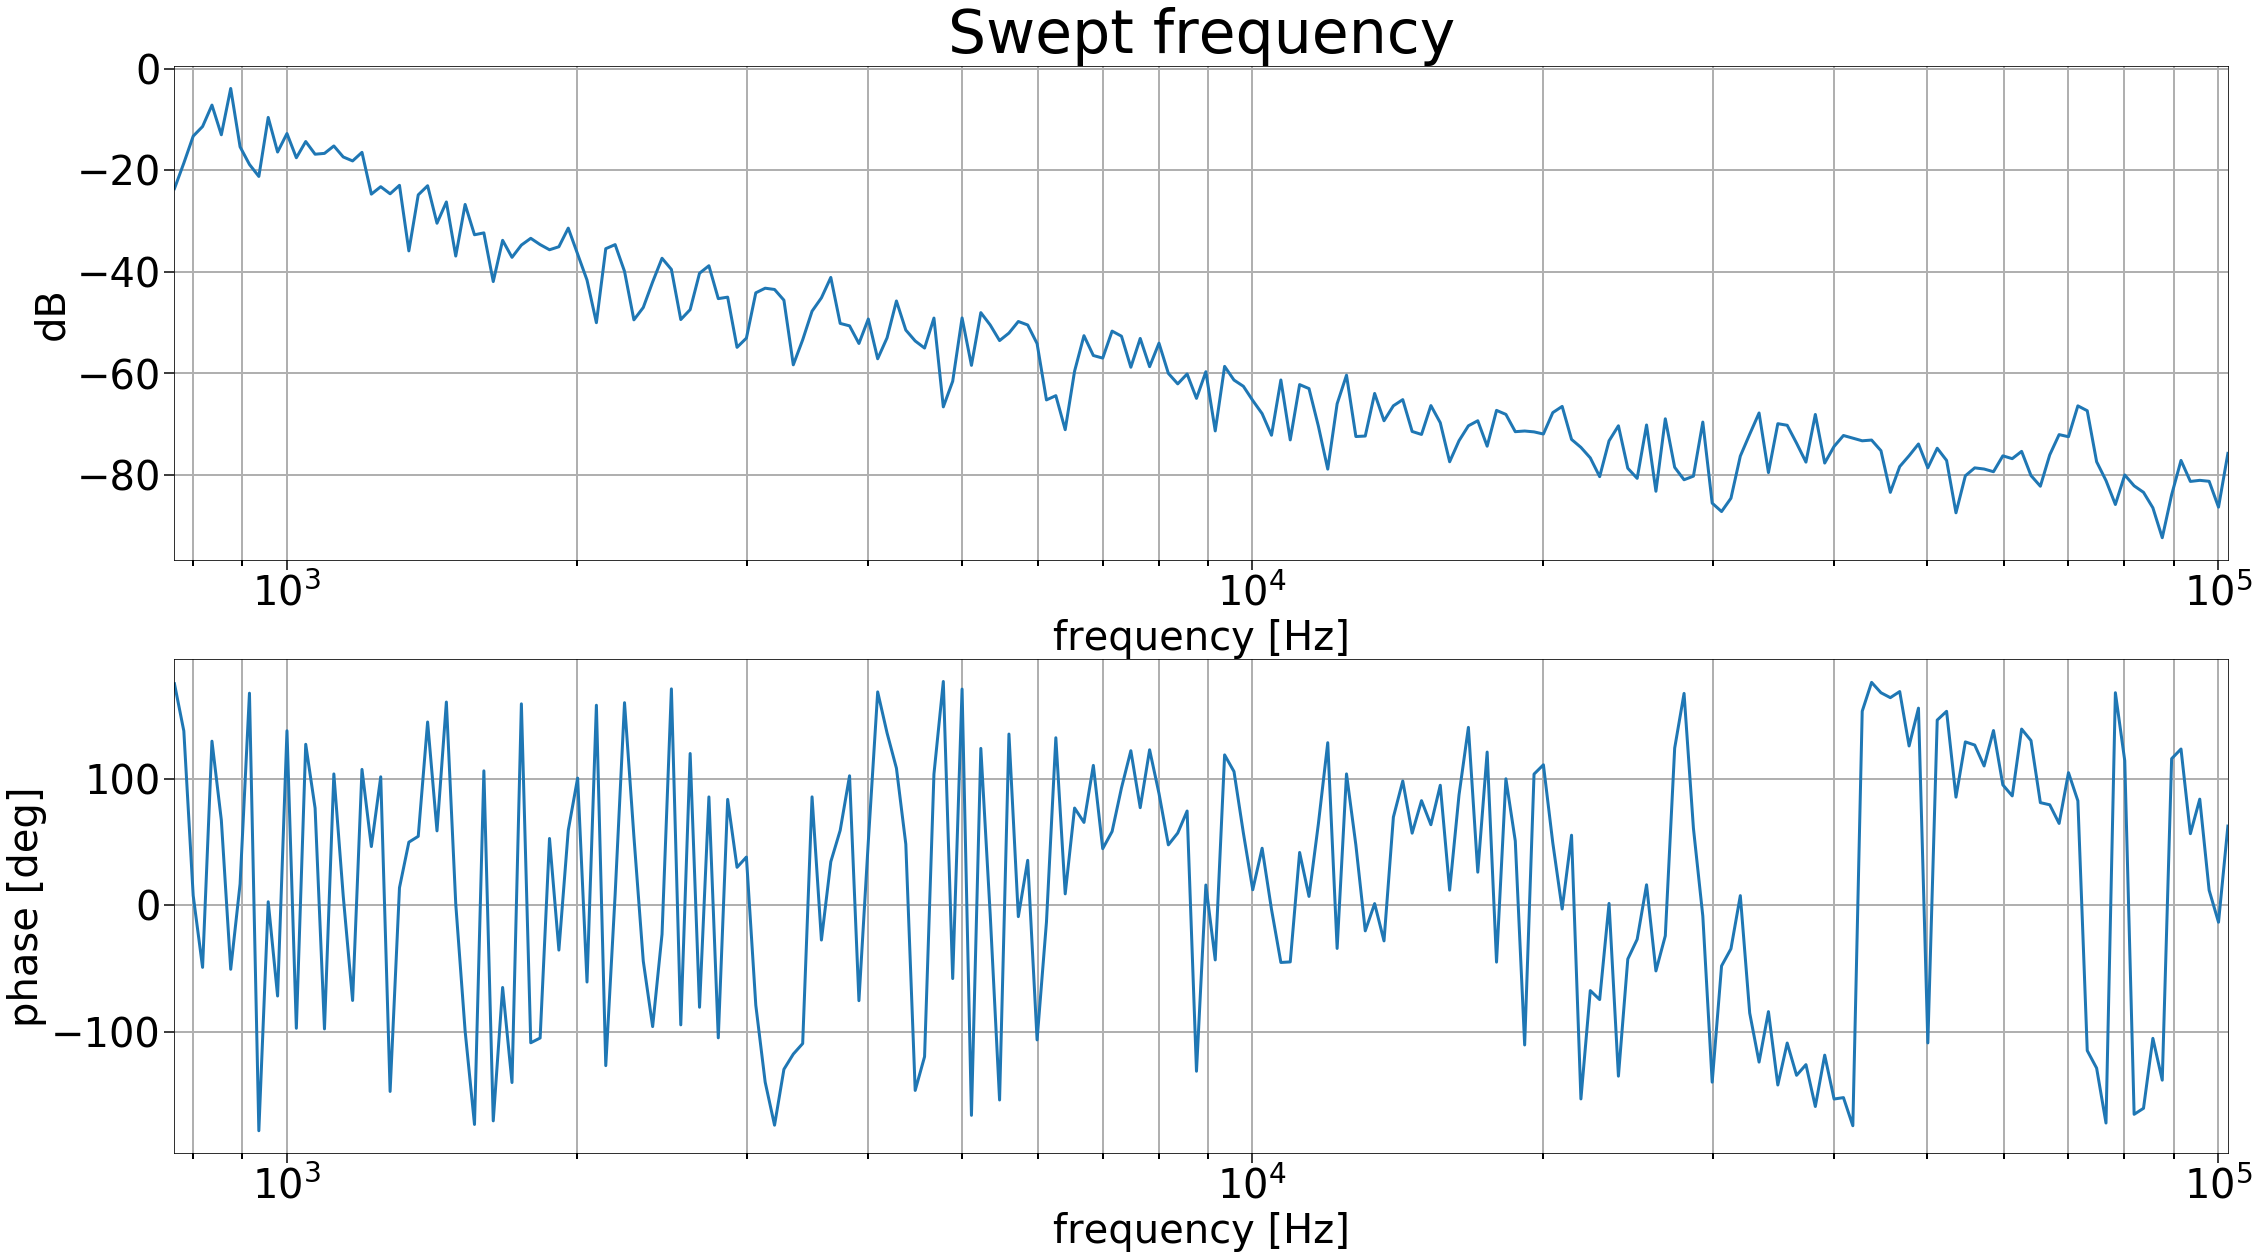

In [101]:
plt.subplot(211)
plt.semilogx(sfdb[80:,0],sfdb[80:,1],linewidth=3)
plt.xlim(sfdb[80:,0][0], sfdb[80:,0][-1])
plt.title('Swept frequency')
plt.xlabel('frequency [Hz]')
plt.ylabel('dB')
plt.subplot(212)
plt.semilogx(sfdeg[80:,0],sfdeg[80:,1],linewidth=3)
plt.xlim(sfdeg[80:,0][0], sfdeg[80:,0][-1])
plt.xlabel('frequency [Hz]')
plt.ylabel('phase [deg]')